# 数式微分のPython実装：sympy

数式自分を行うpythonモジュールにsympyがある．
これを使って数式微分を行う．

In [1]:
# sympyのインポート
import sympy as sp
sp.init_printing() # LaTeX形式で表示する

from sympy import diff, integrate, Derivative

## sympyでの変数・関数と表示

In [2]:
# sympyで用いる変数をsymbols()で宣言する
x, m, sigma = sp.symbols('x m sigma')

In [3]:
# 宣言した変数で数式を作る
gauss = 1 / sp.sqrt(2 * sp.pi * sigma**2) * sp.exp( -(x - m)**2 / (2 * sigma**2))
print(gauss)
print(type(gauss))

sqrt(2)*exp(-(-m + x)**2/(2*sigma**2))/(2*sqrt(pi)*sqrt(sigma**2))
<class 'sympy.core.mul.Mul'>


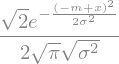

In [4]:
gauss # そのまま評価すると，init_printing()のあとならLaTeX形式で表示される

In [5]:
# 注意：すべての関数・変数はsympyのオブジェクトでなければならない

print("sympy: ", type(sp.exp)) # ok, sympy version
print(sp.exp(x)) # ok

import numpy as np
print("numpy: ", type(np.exp)) # no, this is numpy version
# print(np.exp(x)) # doesn't work !

import math
print("builtin: ", type(math.exp)) # no, this is built-in
# print(math.exp(x)) # doesn't work !

sympy:  <class 'sympy.core.function.FunctionClass'>
exp(x)
numpy:  <class 'numpy.ufunc'>
builtin:  <class 'builtin_function_or_method'>


In [6]:
# 補足：init_printing()を使わずにLaTeX形式で出力する方法

from sympy import latex

# let's make the latex string
gauss_str = latex(gauss, mode='inline')
print(gauss_str)

# use this Latex() for displaying the latex string
from IPython.display import Latex
Latex(gauss_str)

$\frac{\sqrt{2} e^{- \frac{\left(- m + x\right)^{2}}{2 \sigma^{2}}}}{2 \sqrt{\pi} \sqrt{\sigma^{2}}}$


<IPython.core.display.Latex object>

# 数式の微積分

以下は数式の微分と積分を計算する簡単な例である．

## 微分

微分はsympyオブジェクトの関数のメソッド`diff`を用いる．
微分したい変数を引数に与える．

### 2次関数

In [7]:
x, y, a, b, c, d, e = sp.symbols('x y a b c d e')

In [8]:
f = a * x**2 + b * x + c

In [9]:
f

In [10]:
f.diff(x) # 1階微分

In [11]:
f.diff(x).diff(x) # 2階微分

In [12]:
g = a * x**2 + b * x * y + c * x + d * y + e

In [13]:
g

In [14]:
g.diff(x) # 1階微分

In [15]:
g.diff(x).diff(y) # 2階微分

### ガウス関数

In [16]:
x, m, sigma = sp.symbols('x m sigma')

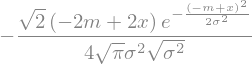

In [17]:
# gauss関数をxで微分する
gauss.diff(x)

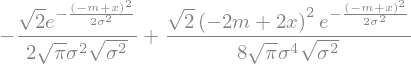

In [18]:
# 再度xで微分する（2階微分）
gauss.diff(x).diff(x)

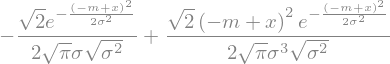

In [19]:
# sigmaで微分することも可能
gauss.diff(sigma)

## 積分

### 2次関数の積分

In [20]:
x, y, a, b, c, d, e = sp.symbols('x y a b c d e')

In [21]:
f = a * x**2 + b * x + c

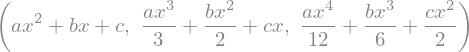

In [22]:
f, f.integrate(x), f.integrate(x).integrate(x)

In [23]:
g = a * x**2 + b * x * y + c * x + d * y + e

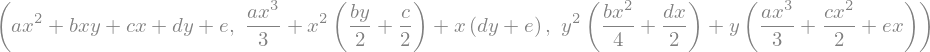

In [24]:
g, g.integrate(x), g.integrate(x).integrate(y)

### ガウス関数の積分

In [25]:
x, m, sigma = sp.symbols('x m sigma')

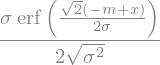

In [26]:
# gaussのxによる不定積分
integrate(gauss, x)

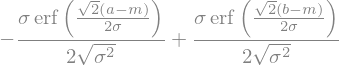

In [27]:
# aからｂまでの定積分
a, b = sp.symbols('a b')
gauss.integrate((x, a, b))

# 行列計算

## 固有値計算の例

In [28]:
# ランダムな整数行列を生成
a = np.random.randint(1, 10, size=(2,2))
a # numpyオブジェクト

array([[1, 4],
       [8, 8]])

In [29]:
# numpyを用いて数値的に固有値を計算
np.linalg.eigvals(a)

array([-2.15206735, 11.15206735])

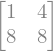

In [30]:
# いちどlistにしてからsympyのMatrixオブジェクトへ変換する
a = sp.Matrix(a.tolist())
a # sympyオブジェクト

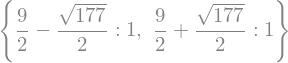

In [31]:
# sympyを用いて解析的に固有値を計算
a.eigenvals()

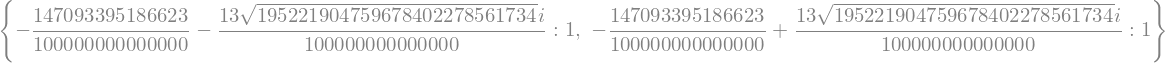

In [32]:
# 実数値行列でもできないことはない
b = sp.Matrix(np.random.randn(2,2))
b.eigenvals() 

## 行列演算

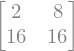

In [33]:
a + a # 行列の和は+でよい

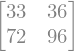

In [34]:
a * a # 行列の積は*でよい（要素ごとの積ではない）

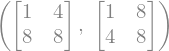

In [35]:
a, a.transpose()

## ヤコビ行列

$\boldsymbol{f} = R(\theta_1) R(\theta_2) \boldsymbol{x}$を考える．

ここで
$R(\theta) = \begin{pmatrix}
	\sin\theta & \cos\theta \\
	-\cos\theta & \sin\theta
	\end{pmatrix}
$

In [36]:
theta1, theta2, x1, x2 = sp.symbols('theta1 theta2 x1 x2')

R1 = sp.Matrix([[ sp.sin(theta1), sp.cos(theta1)],
                 [-sp.cos(theta1), sp.sin(theta1)]])
R2 = sp.Matrix([[ sp.sin(theta2), sp.cos(theta2)],
                 [-sp.cos(theta2), sp.sin(theta2)]])

f = R1 * R2 * sp.Matrix([[x1], [x2]])

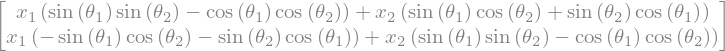

In [37]:
f # 関数fの評価

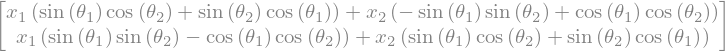

In [38]:
f.diff(theta1) # theta1による偏微分

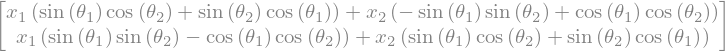

In [39]:
f.diff(theta2) # theta2による偏微分

ヤコビ行列を計算するには，ベクトル値関数`f`のメソッド`jacobian`に，
微分する変数のリストを与える．

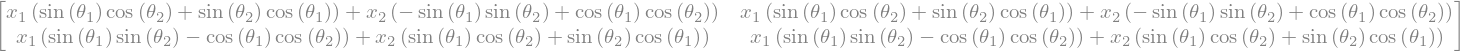

In [40]:
f.jacobian([theta1, theta2])

# Task

## 座標変換のヤコビ行列


ある座標系における点$\boldsymbol{x}$を
$
\boldsymbol{y} = R_1 \boldsymbol{x} + \boldsymbol{t}_1
$
と座標変換し，点$\boldsymbol{y}$とする．
これをさらに
$
\boldsymbol{z} = R_2 \boldsymbol{y} + \boldsymbol{t}_2
$
と座標変換して点$\boldsymbol{z}$とする．
ここで$R_i$は回転行列
$$
R_i = \begin{pmatrix}
\sin\theta_i & \cos\theta_i \\
-\cos\theta_i & \sin\theta_i
\end{pmatrix}
$$
である．

sympyでヤコビ行列
$\dfrac{\partial \boldsymbol{z}}{\partial \boldsymbol{\theta}}$
を求めよ．


## 交差エントロピーの微分

$N=5$とする．
`a1, ..., a5`と`y1, ..., y5`
をsympy変数として定義する．
以下の関数を定義する．

$f(\boldsymbol{a}) = -\sum_{i=1}^{N} y_i \log f_i(\boldsymbol{a})$

ただし

$f_i(\boldsymbol{a}) = \operatorname{softmax}_i(\boldsymbol{a}) = \dfrac{e^{a_i}}{\sum_{j=1}^N e^{a_j}}$


sympyで勾配ベクトル
$\dfrac{\partial f}{\partial \boldsymbol{a}}$
を求めよ．